In [1]:
import pandas as pd
import numpy as np

In [2]:
df_pollutants = pd.read_csv('C:/Users/MD.ZAID SHAIKH/Desktop/AIR_QUALITY_MONITORING/Backend/data/factors_Nashik.csv')
df_weather = pd.read_csv('C:/Users/MD.ZAID SHAIKH/Desktop/AIR_QUALITY_MONITORING/Backend/data/pollutants_Nashik.csv')


In [3]:
# Sort both datasets by date in ascending order
df_pollutants = df_pollutants.sort_values('date')
df_weather = df_weather.sort_values('date')

In [4]:
# Convert date columns to datetime format
df_pollutants['date'] = pd.to_datetime(df_pollutants['date'])
df_weather['date'] = pd.to_datetime(df_weather['date'])

In [5]:
# Find common dates
common_dates = set(df_pollutants['date']).intersection(set(df_weather['date']))

# Filter both datasets to keep only common dates
df_pollutants = df_pollutants[df_pollutants['date'].isin(common_dates)]
df_weather = df_weather[df_weather['date'].isin(common_dates)]


In [6]:
# Merge datasets on date
df_combined = pd.merge(df_pollutants, df_weather, on='date', how='inner')


In [7]:
df_combined.head()

,date,temperature_2m_max (°C),temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),pm25,pm10,o3,no2,so2,co
0,2018-12-01,26.7,20.0,0.0,10.5,69,13.95,154,66,67,22,4,12
1,2018-12-02,27.8,20.7,0.0,10.7,80,16.24,150,65,60,22,2,10
2,2018-12-03,27.9,20.9,0.0,10.0,46,14.86,148,68,58,22,3,11
3,2018-12-04,27.8,21.5,0.0,9.7,79,15.20,145,67,30,17,1,9
4,2018-12-05,28.3,21.8,0.0,13.8,141,16.60,149,55,9,25,1,11


In [8]:
print("Pollutant Data Rows:", len(df_pollutants))
print("Weather Data Rows:", len(df_weather))
print("Combined Data Rows:", len(df_combined))


Pollutant Data Rows: 2204
Weather Data Rows: 2204
Combined Data Rows: 2204


In [9]:
print(df_combined.info())  # Check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             2204 non-null   datetime64[ns]
 1   temperature_2m_max (°C)          2204 non-null   float64       
 2   temperature_2m_mean (°C)         2204 non-null   float64       
 3   precipitation_sum (mm)           2204 non-null   float64       
 4   wind_speed_10m_max (km/h)        2204 non-null   float64       
 5   wind_direction_10m_dominant (°)  2204 non-null   int64         
 6   shortwave_radiation_sum (MJ/m²)  2204 non-null   float64       
 7    pm25                            2204 non-null   object        
 8    pm10                            2204 non-null   object        
 9    o3                              2204 non-null   object        
 10   no2                             2204 non-null   object     

In [10]:
# Convert pollutant columns to numeric
pollutant_columns = [' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']

for col in pollutant_columns:
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')


In [11]:
# Check for missing values
print(df_combined[pollutant_columns].isnull().sum())


pm25      68
pm10      53
o3        68
no2      215
so2     1050
co       119
dtype: int64


In [12]:
# Fill missing values using interpolation
df_combined[pollutant_columns] = df_combined[pollutant_columns].interpolate(method='linear', limit_direction='both')

# Double-check for any remaining NaNs
print(df_combined[pollutant_columns].isnull().sum())


pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
dtype: int64


In [13]:
# Verify data types
print(df_combined.dtypes)


date                               datetime64[ns]
temperature_2m_max (°C)                   float64
temperature_2m_mean (°C)                  float64
precipitation_sum (mm)                    float64
wind_speed_10m_max (km/h)                 float64
wind_direction_10m_dominant (°)             int64
shortwave_radiation_sum (MJ/m²)           float64
 pm25                                     float64
 pm10                                     float64
 o3                                       float64
 no2                                      float64
 so2                                      float64
 co                                       float64
dtype: object


In [14]:
# Temporal features
df_combined['day_of_week'] = df_combined['date'].dt.dayofweek
df_combined['month'] = df_combined['date'].dt.month
df_combined['season'] = (df_combined['month'] % 12 + 3) // 3  # 1: Winter, 2: Spring, etc.


In [15]:
# Lag features for pollutants
df_combined['pm25_lag1'] = df_combined[' pm25'].shift(1)
df_combined['pm25_lag2'] = df_combined[' pm25'].shift(2)


In [16]:
# 7-day rolling average for PM2.5
df_combined['pm25_7day_avg'] = df_combined[' pm25'].rolling(window=7).mean()


In [17]:
# Drop rows with NaN values
df_combined.dropna(inplace=True)


In [18]:
# Add a time index
df_combined['time_idx'] = (df_combined['date'] - df_combined['date'].min()).dt.days


In [19]:
print(df_combined.head())

         date  temperature_2m_max (°C)  temperature_2m_mean (°C)  \
6  2018-12-07                     29.4                      21.7   
7  2018-12-08                     29.6                      22.4   
8  2018-12-09                     29.7                      20.9   
9  2018-12-10                     26.9                      19.5   
10 2018-12-11                     26.5                      19.1   

    precipitation_sum (mm)  wind_speed_10m_max (km/h)  \
6                      0.0                       13.1   
7                      0.0                       16.0   
8                      0.0                       13.0   
9                      0.0                       11.7   
10                     0.0                       11.2   

    wind_direction_10m_dominant (°)  shortwave_radiation_sum (MJ/m²)   pm25  \
6                               328                            16.69   90.0   
7                               271                            16.77   63.0   
8          

In [20]:
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2198 entries, 6 to 2203
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             2198 non-null   datetime64[ns]
 1   temperature_2m_max (°C)          2198 non-null   float64       
 2   temperature_2m_mean (°C)         2198 non-null   float64       
 3   precipitation_sum (mm)           2198 non-null   float64       
 4   wind_speed_10m_max (km/h)        2198 non-null   float64       
 5   wind_direction_10m_dominant (°)  2198 non-null   int64         
 6   shortwave_radiation_sum (MJ/m²)  2198 non-null   float64       
 7    pm25                            2198 non-null   float64       
 8    pm10                            2198 non-null   float64       
 9    o3                              2198 non-null   float64       
 10   no2                             2198 non-null   float64       
 

In [21]:
breakpoints = {
    "pm25": [
        {"low": 0, "high": 12, "aqi_low": 0, "aqi_high": 50},
        {"low": 12.1, "high": 35.4, "aqi_low": 51, "aqi_high": 100},
        {"low": 35.5, "high": 55.4, "aqi_low": 101, "aqi_high": 150},
        {"low": 55.5, "high": 150.4, "aqi_low": 151, "aqi_high": 200},
        {"low": 150.5, "high": 250.4, "aqi_low": 201, "aqi_high": 300},
        {"low": 250.5, "high": 350.4, "aqi_low": 301, "aqi_high": 400},
        {"low": 350.5, "high": 500.4, "aqi_low": 401, "aqi_high": 500}
    ],
    "pm10": [
        {"low": 0, "high": 54, "aqi_low": 0, "aqi_high": 50},
        {"low": 55, "high": 154, "aqi_low": 51, "aqi_high": 100},
        {"low": 155, "high": 254, "aqi_low": 101, "aqi_high": 150},
        {"low": 255, "high": 354, "aqi_low": 151, "aqi_high": 200},
        {"low": 355, "high": 424, "aqi_low": 201, "aqi_high": 300},
        {"low": 425, "high": 504, "aqi_low": 301, "aqi_high": 400},
        {"low": 505, "high": 604, "aqi_low": 401, "aqi_high": 500}
    ],
    "o3": [
        {"low": 0, "high": 54, "aqi_low": 0, "aqi_high": 50},
        {"low": 55, "high": 70, "aqi_low": 51, "aqi_high": 100},
        {"low": 71, "high": 85, "aqi_low": 101, "aqi_high": 150},
        {"low": 86, "high": 105, "aqi_low": 151, "aqi_high": 200},
        {"low": 106, "high": 200, "aqi_low": 201, "aqi_high": 300},
        {"low": 201, "high": 300, "aqi_low": 301, "aqi_high": 400},
        {"low": 301, "high": 400, "aqi_low": 401, "aqi_high": 500}
    ],
    "no2": [
        {"low": 0, "high": 53, "aqi_low": 0, "aqi_high": 50},
        {"low": 54, "high": 100, "aqi_low": 51, "aqi_high": 100},
        {"low": 101, "high": 360, "aqi_low": 101, "aqi_high": 150},
        {"low": 361, "high": 649, "aqi_low": 151, "aqi_high": 200},
        {"low": 650, "high": 1249, "aqi_low": 201, "aqi_high": 300},
        {"low": 1250, "high": 1649, "aqi_low": 301, "aqi_high": 400},
        {"low": 1650, "high": 2049, "aqi_low": 401, "aqi_high": 500}
    ],
    "so2": [
        {"low": 0, "high": 35, "aqi_low": 0, "aqi_high": 50},
        {"low": 36, "high": 75, "aqi_low": 51, "aqi_high": 100},
        {"low": 76, "high": 185, "aqi_low": 101, "aqi_high": 150},
        {"low": 186, "high": 304, "aqi_low": 151, "aqi_high": 200},
        {"low": 305, "high": 604, "aqi_low": 201, "aqi_high": 300},
        {"low": 605, "high": 804, "aqi_low": 301, "aqi_high": 400},
        {"low": 805, "high": 1004, "aqi_low": 401, "aqi_high": 500}
    ],
    "co": [
        {"low": 0, "high": 4.4, "aqi_low": 0, "aqi_high": 50},
        {"low": 4.5, "high": 9.4, "aqi_low": 51, "aqi_high": 100},
        {"low": 9.5, "high": 12.4, "aqi_low": 101, "aqi_high": 150},
        {"low": 12.5, "high": 15.4, "aqi_low": 151, "aqi_high": 200},
        {"low": 15.5, "high": 30.4, "aqi_low": 201, "aqi_high": 300},
        {"low": 30.5, "high": 40.4, "aqi_low": 301, "aqi_high": 400},
        {"low": 40.5, "high": 50.4, "aqi_low": 401, "aqi_high": 500}
    ]
}
 
# Function to calculate AQI for a pollutant based on its concentration
def calculate_aqi_for_pollutant(concentration, pollutant):
    if pd.isna(concentration):  # Handle missing values
        return None
    for bp in breakpoints[pollutant]:
        if bp["low"] <= concentration <= bp["high"]:
            # Linear interpolation to calculate AQI
            return ((bp["aqi_high"] - bp["aqi_low"]) / (bp["high"] - bp["low"])) * (concentration - bp["low"]) + bp["aqi_low"]
    return None  # Return None if concentration is outside all breakpoints  

# Strip leading/trailing spaces from column names
df_combined.columns = df_combined.columns.str.strip()

# Debug: Check if column names match
print("Column names in df_combined:", df_combined.columns)

# Create a new DataFrame to store AQI calculations
df_with_aqi = df_combined.copy()

# Example pollutant column names in df_combined
pollutants = ["pm25", "pm10", "o3", "no2", "so2", "co"]  # Update if column names are different

# Debug: Check if pollutant columns exist
missing_columns = [col for col in pollutants if col not in df_combined.columns]
if missing_columns:
    print(f"Missing pollutant columns in dataset: {missing_columns}")
else:
    print("All pollutant columns are present.")

# Ensure all pollutant columns are numeric
for pollutant in pollutants:
    if pollutant in df_combined.columns:
        df_with_aqi[pollutant] = pd.to_numeric(df_with_aqi[pollutant], errors='coerce')

# Debug: Check for NaN values
print("Number of NaN values per column:")
print(df_with_aqi[pollutants].isna().sum())

# Calculate AQI for each pollutant across all rows in df_with_aqi
for pollutant in pollutants:
    if pollutant in df_with_aqi.columns:
        df_with_aqi[f"{pollutant}_aqi"] = df_with_aqi[pollutant].apply(
            lambda x: calculate_aqi_for_pollutant(x, pollutant)
        )

# Calculate overall AQI as the maximum of all individual AQI values for each row
aqi_columns = [f"{pollutant}_aqi" for pollutant in pollutants if f"{pollutant}_aqi" in df_with_aqi.columns]
if aqi_columns:
    df_with_aqi["overall_aqi"] = df_with_aqi[aqi_columns].max(axis=1)

# Debug: Display the first few rows of the new DataFrame
print("Updated DataFrame with AQI calculations:")
print(df_with_aqi.head())



Column names in df_combined: Index(['date', 'temperature_2m_max (°C)', 'temperature_2m_mean (°C)',
       'precipitation_sum (mm)', 'wind_speed_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)',
       'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'day_of_week', 'month',
       'season', 'pm25_lag1', 'pm25_lag2', 'pm25_7day_avg', 'time_idx'],
      dtype='object')
All pollutant columns are present.
Number of NaN values per column:
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
dtype: int64
Updated DataFrame with AQI calculations:
         date  temperature_2m_max (°C)  temperature_2m_mean (°C)  \
6  2018-12-07                     29.4                      21.7   
7  2018-12-08                     29.6                      22.4   
8  2018-12-09                     29.7                      20.9   
9  2018-12-10                     26.9                      19.5   
10 2018-12-11                     26.5                      19.1   

   

In [22]:
df_with_aqi.head(5)

,date,temperature_2m_max (°C),temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),pm25,pm10,o3,...,pm25_lag2,pm25_7day_avg,time_idx,pm25_aqi,pm10_aqi,o3_aqi,no2_aqi,so2_aqi,co_aqi,overall_aqi
6,2018-12-07,29.4,21.7,0.0,13.1,328,16.69,90.0,49.0,54.0,...,149.0,132.428571,0,168.813488,45.370370,50.000000,12.264151,1.428571,56.000000,168.813488
7,2018-12-08,29.6,22.4,0.0,16.0,271,16.77,63.0,46.0,51.0,...,91.0,119.428571,1,154.872497,42.592593,47.222222,12.264151,1.428571,56.000000,154.872497
8,2018-12-09,29.7,20.9,0.0,13.0,303,16.94,55.0,60.0,53.0,...,90.0,105.857143,2,149.015075,53.474747,49.074074,10.377358,1.428571,45.454545,149.015075
9,2018-12-10,26.9,19.5,0.0,11.7,310,17.37,96.0,50.0,61.0,...,63.0,98.428571,3,171.911486,46.296296,70.600000,11.320755,1.428571,56.000000,171.911486
10,2018-12-11,26.5,19.1,0.0,11.2,345,17.03,150.0,54.0,58.5,...,55.0,99.142857,4,199.793467,50.000000,62.433333,14.150943,5.714286,61.000000,199.793467


In [23]:
print(df_with_aqi.columns)

Index(['date', 'temperature_2m_max (°C)', 'temperature_2m_mean (°C)',
       'precipitation_sum (mm)', 'wind_speed_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)',
       'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'day_of_week', 'month',
       'season', 'pm25_lag1', 'pm25_lag2', 'pm25_7day_avg', 'time_idx',
       'pm25_aqi', 'pm10_aqi', 'o3_aqi', 'no2_aqi', 'so2_aqi', 'co_aqi',
       'overall_aqi'],
      dtype='object')


In [24]:
column_names = df_with_aqi.columns.tolist()
print(column_names)

['date', 'temperature_2m_max (°C)', 'temperature_2m_mean (°C)', 'precipitation_sum (mm)', 'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'day_of_week', 'month', 'season', 'pm25_lag1', 'pm25_lag2', 'pm25_7day_avg', 'time_idx', 'pm25_aqi', 'pm10_aqi', 'o3_aqi', 'no2_aqi', 'so2_aqi', 'co_aqi', 'overall_aqi']


In [25]:
for i, col in enumerate(df_with_aqi.columns):
    print(f"{i}: {col}")

0: date
1: temperature_2m_max (°C)
2: temperature_2m_mean (°C)
3: precipitation_sum (mm)
4: wind_speed_10m_max (km/h)
5: wind_direction_10m_dominant (°)
6: shortwave_radiation_sum (MJ/m²)
7: pm25
8: pm10
9: o3
10: no2
11: so2
12: co
13: day_of_week
14: month
15: season
16: pm25_lag1
17: pm25_lag2
18: pm25_7day_avg
19: time_idx
20: pm25_aqi
21: pm10_aqi
22: o3_aqi
23: no2_aqi
24: so2_aqi
25: co_aqi
26: overall_aqi


In [26]:
print(df_with_aqi.dtypes)

date                               datetime64[ns]
temperature_2m_max (°C)                   float64
temperature_2m_mean (°C)                  float64
precipitation_sum (mm)                    float64
wind_speed_10m_max (km/h)                 float64
wind_direction_10m_dominant (°)             int64
shortwave_radiation_sum (MJ/m²)           float64
pm25                                      float64
pm10                                      float64
o3                                        float64
no2                                       float64
so2                                       float64
co                                        float64
day_of_week                                 int32
month                                       int32
season                                      int32
pm25_lag1                                 float64
pm25_lag2                                 float64
pm25_7day_avg                             float64
time_idx                                    int64


In [27]:
print(df_with_aqi.describe())

                                date  temperature_2m_max (°C)  \
count                           2198              2198.000000   
mean   2021-12-30 19:32:42.147406848                30.201183   
min              2018-12-07 00:00:00                20.700000   
25%              2020-06-22 06:00:00                27.300000   
50%              2021-12-27 12:00:00                29.100000   
75%              2023-07-10 18:00:00                33.000000   
max              2025-01-25 00:00:00                41.700000   
std                              NaN                 4.092656   

       temperature_2m_mean (°C)  precipitation_sum (mm)  \
count               2198.000000             2198.000000   
mean                  24.298772                3.148362   
min                   14.100000                0.000000   
25%                   22.400000                0.000000   
50%                   23.900000                0.000000   
75%                   25.775000                2.300000   
m

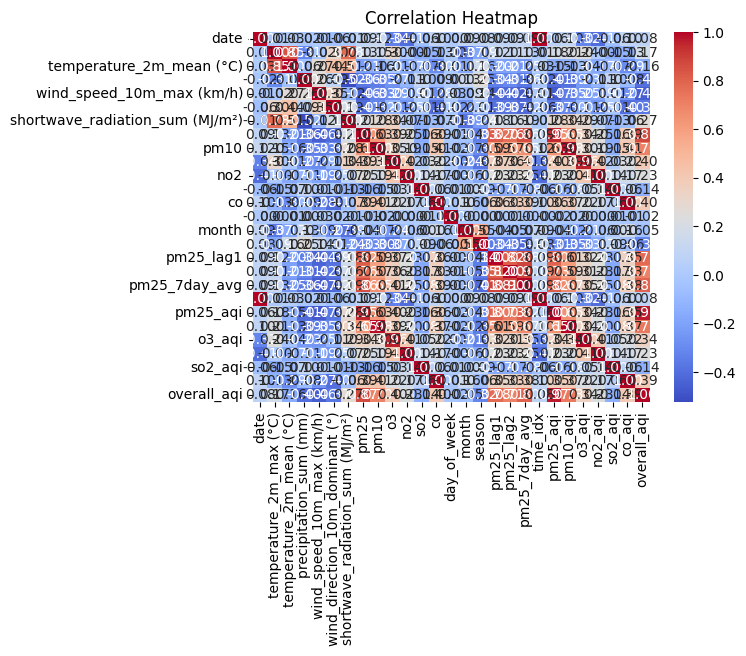

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_with_aqi.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


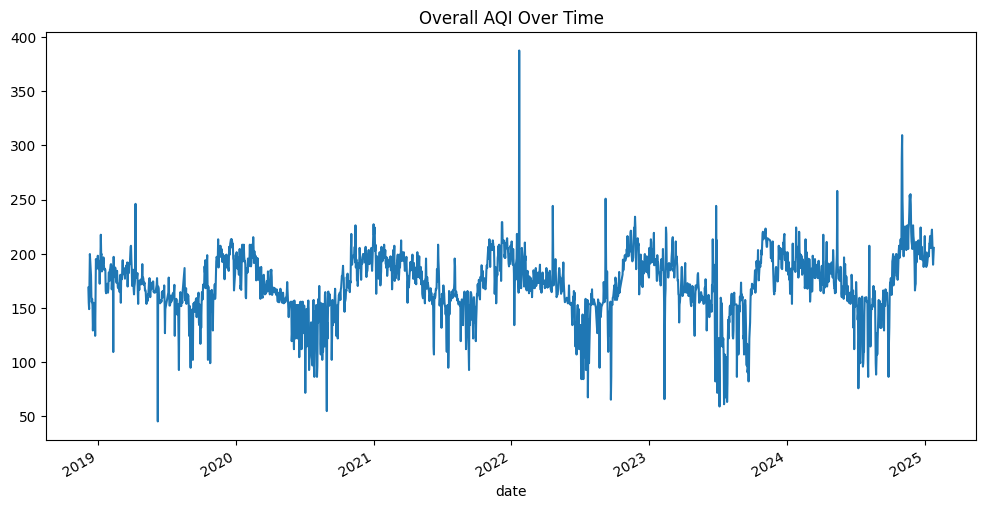

In [29]:
df_with_aqi_reset = df_with_aqi.reset_index()
df_with_aqi_reset['date'] = pd.to_datetime(df_with_aqi_reset['date'])
df_with_aqi_reset.set_index('date', inplace=True)
df_with_aqi_reset['overall_aqi'].plot(figsize=(12, 6), title="Overall AQI Over Time")
plt.show()


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Ensure 'overall_aqi' column exists in df_with_aqi_reset
if 'overall_aqi' in df_with_aqi_reset.columns:
	if 'date' in df_with_aqi_reset.columns:
		X = df_with_aqi_reset.drop(columns=["overall_aqi", "date"])
	else:
		X = df_with_aqi_reset.drop(columns=["overall_aqi"])
	y = df_with_aqi_reset["overall_aqi"]
else:
	raise KeyError("Column 'overall_aqi' not found in DataFrame")

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

model = RandomForestRegressor()
model.fit(X_imputed, y)
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)
print(feature_importance)


                            Feature  Importance
20                         pm25_aqi    0.648660
7                              pm25    0.302891
8                              pm10    0.017395
21                         pm10_aqi    0.014153
25                           co_aqi    0.006684
12                               co    0.006626
16                        pm25_lag1    0.000540
24                          so2_aqi    0.000399
5   wind_direction_10m_dominant (°)    0.000370
18                    pm25_7day_avg    0.000291
9                                o3    0.000277
17                        pm25_lag2    0.000258
22                           o3_aqi    0.000214
4         wind_speed_10m_max (km/h)    0.000187
1           temperature_2m_max (°C)    0.000161
11                              so2    0.000155
0                             index    0.000108
2          temperature_2m_mean (°C)    0.000107
23                          no2_aqi    0.000105
19                         time_idx    0

In [31]:
# Reset index to make 'date' a column again
df_combined_reset = df_with_aqi.reset_index()

train = df_combined_reset[df_combined_reset["date"] < "2024-01-01"]
val = df_combined_reset[(df_combined_reset["date"] >= "2024-01-01") & (df_combined_reset["date"] < "2025-01-01")]
test = df_combined_reset[df_combined_reset["date"] >= "2025-01-01"]


In [32]:
# Reset index to make 'date' a column again
df_with_aqi_reset = df_with_aqi.reset_index()

train = df_with_aqi_reset[df_with_aqi_reset["date"] < "2024-01-01"]
val = df_with_aqi_reset[(df_with_aqi_reset["date"] >= "2024-01-01") & (df_with_aqi_reset["date"] < "2025-01-01")]
test = df_with_aqi_reset[df_with_aqi_reset["date"] >= "2025-01-01"]

In [33]:
df_with_aqi_reset.columns

Index(['index', 'date', 'temperature_2m_max (°C)', 'temperature_2m_mean (°C)',
       'precipitation_sum (mm)', 'wind_speed_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)',
       'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'day_of_week', 'month',
       'season', 'pm25_lag1', 'pm25_lag2', 'pm25_7day_avg', 'time_idx',
       'pm25_aqi', 'pm10_aqi', 'o3_aqi', 'no2_aqi', 'so2_aqi', 'co_aqi',
       'overall_aqi'],
      dtype='object')

In [34]:
df_with_aqi_reset.head(5)

,index,date,temperature_2m_max (°C),temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),pm25,pm10,...,pm25_lag2,pm25_7day_avg,time_idx,pm25_aqi,pm10_aqi,o3_aqi,no2_aqi,so2_aqi,co_aqi,overall_aqi
0,6,2018-12-07,29.4,21.7,0.0,13.1,328,16.69,90.0,49.0,...,149.0,132.428571,0,168.813488,45.370370,50.000000,12.264151,1.428571,56.000000,168.813488
1,7,2018-12-08,29.6,22.4,0.0,16.0,271,16.77,63.0,46.0,...,91.0,119.428571,1,154.872497,42.592593,47.222222,12.264151,1.428571,56.000000,154.872497
2,8,2018-12-09,29.7,20.9,0.0,13.0,303,16.94,55.0,60.0,...,90.0,105.857143,2,149.015075,53.474747,49.074074,10.377358,1.428571,45.454545,149.015075
3,9,2018-12-10,26.9,19.5,0.0,11.7,310,17.37,96.0,50.0,...,63.0,98.428571,3,171.911486,46.296296,70.600000,11.320755,1.428571,56.000000,171.911486
4,10,2018-12-11,26.5,19.1,0.0,11.2,345,17.03,150.0,54.0,...,55.0,99.142857,4,199.793467,50.000000,62.433333,14.150943,5.714286,61.000000,199.793467


In [70]:
from sklearn.preprocessing import StandardScaler

# List of columns to be standardized
features = [
    'temperature_2m_max (°C)', 'temperature_2m_mean (°C)', 'precipitation_sum (mm)', 
    'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)', 
    'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'day_of_week', 'month', 'season', 
    'pm25_lag1', 'pm25_lag2', 'pm25_7day_avg', 'time_idx', 'pm25_aqi', 'pm10_aqi', 
    'o3_aqi', 'no2_aqi', 'so2_aqi', 'co_aqi', 'overall_aqi'
]

# Ensure the columns exist in the DataFrames
for feature in features:
    if feature not in train.columns:
        train[feature] = 0
    if feature not in val.columns:
        val[feature] = 0
    if feature not in test.columns:
        test[feature] = 0

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
train.loc[:, features] = scaler.fit_transform(train[features])

# Transform the validation and test data
val.loc[:, features] = scaler.transform(val[features])
test.loc[:, features] = scaler.transform(test[features])


C:\Users\MD.ZAID SHAIKH\AppData\Local\Temp\ipykernel_141920\447924471.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.73696122 -1.73507886 -1.7331965  ...  1.74163803  1.74352039
  1.74540275]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  train.loc[:, features] = scaler.fit_transform(train[features])
C:\Users\MD.ZAID SHAIKH\AppData\Local\Temp\ipykernel_141920\447924471.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.74728511 1.74916747 1.75104982 1.75293218 1.75481454 1.7566969
 1.75857926 1.76046162 1.76234398 1.76422634 1.7661087  1.76799105
 1.76987341 1.77175577 1.77363813 1.77552049 1.77740285 1.77928521
 1.78116757 1.78304993 1.78493228 1.78681464 1.788697   1.79057936
 1.79246172 1.79434408 1.79622644 1.7981088  1.79999116 1.80187351
 1.80375587 1.80563823 1.80752059 1.80940295

In [71]:
pip install pytorch-forecasting

Note: you may need to restart the kernel to use updated packages.


In [76]:
from pytorch_forecasting import TimeSeriesDataSet

# Ensure time_idx is of type integer
train["time_idx"] = train["time_idx"].astype(int)
val["time_idx"] = val["time_idx"].astype(int)

# Convert categorical columns to string type
train["day_of_week"] = train["day_of_week"].astype(str)
train["month"] = train["month"].astype(str)
train["season"] = train["season"].astype(str)
val["day_of_week"] = val["day_of_week"].astype(str)
val["month"] = val["month"].astype(str)
val["season"] = val["season"].astype(str)

# Define the TimeSeriesDataSet
max_prediction_length = 15  # Example: predict the next 15 days
max_encoder_length = 180  # Example: use the past 180 days as context

training = TimeSeriesDataSet(
    train,
    time_idx="time_idx",
    target="overall_aqi",
    group_ids=["time_idx"],  # Assuming no groups, but you can specify if needed
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],  # Specify any static categorical features
    static_reals=[],  # Specify any static real-valued features
    time_varying_known_categoricals=["day_of_week", "month", "season"],  # Specify time-varying known categorical features
    time_varying_known_reals=["temperature_2m_max (°C)", "temperature_2m_mean (°C)", "precipitation_sum (mm)", 
                              "wind_speed_10m_max (km/h)", "wind_direction_10m_dominant (°)", "shortwave_radiation_sum (MJ/m²)", 
                              "pm25", "pm10", "o3", "no2", "so2", "co", "pm25_lag1", "pm25_lag2", "pm25_7day_avg"],  # Specify time-varying known real-valued features
    time_varying_unknown_categoricals=[],  # Specify time-varying unknown categorical features
    time_varying_unknown_reals=["overall_aqi"],  # Specify time-varying unknown real-valued features
    target_normalizer=None,  # You can specify a normalizer if needed
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True,  # Allow missing timesteps
)

# Create validation dataset
validation = TimeSeriesDataSet.from_dataset(training, val, predict=True, stop_randomization=True)

C:\Users\MD.ZAID SHAIKH\AppData\Local\Temp\ipykernel_141920\3972424428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["time_idx"] = train["time_idx"].astype(int)
C:\Users\MD.ZAID SHAIKH\AppData\Local\Temp\ipykernel_141920\3972424428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["time_idx"] = val["time_idx"].astype(int)
C:\Users\MD.ZAID SHAIKH\AppData\Local\Temp\ipykernel_141920\3972424428.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

AssertionError: filters should not remove entries all entries - check encoder/decoder lengths and lags

In [ ]:
import pytorch_forecasting
from pytorch_forecasting import TemporalFusionTransformer
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
import pytorch_lightning as pl

# Define the features you want to use for training
features = [
    'temperature_2m_max (°C)', 'temperature_2m_mean (°C)', 'precipitation_sum (mm)', 
    'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)', 
    'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'day_of_week', 'month', 'season', 
    'pm25_lag1', 'pm25_lag2', 'pm25_7day_avg', 'time_idx', 'pm25_aqi', 'pm10_aqi', 
    'o3_aqi', 'no2_aqi', 'so2_aqi', 'co_aqi', 'overall_aqi'
]

# Convert DataFrame to TimeSeriesDataSet format
# Use the train, validation, and test data split you defined earlier
training = TimeSeriesDataSet(
    train[features + ['overall_aqi']], 
    time_idx="time_idx",
    target="overall_aqi",
    group_ids=["date"],  # Ensure it's treated as a time-series sequence for each day
    min_encoder_length=30,  # History length (30 days in this case)
    max_encoder_length=60,  # Maximum history length (60 days in this case)
    min_prediction_length=1,  # Predict next value (1 day)
    max_prediction_length=1,  # Predict the next day's AQI
    static_categoricals=["season"],  # Include any static categories if you have any
    time_varying_known_reals=features,  # Features that change over time
    time_varying_unknown_reals=["overall_aqi"],  # Target column (AQI)
    add_relative_time_idx=True,  # Add time relative to the start of the dataset
    add_target_scales=True,  # Scale target for improved performance
    add_encoder_length=True,  # Include sequence length as a feature
)

# Create validation and test datasets
validation = TimeSeriesDataSet.from_dataset(training, val, predict=True)
test = TimeSeriesDataSet.from_dataset(training, test, predict=True)

# Create data loaders for efficient batching
train_dataloader = pl.data.DataLoader(training, batch_size=64, shuffle=True)
val_dataloader = pl.data.DataLoader(validation, batch_size=64, shuffle=False)
test_dataloader = pl.data.DataLoader(test, batch_size=64, shuffle=False)

# Define the Temporal Fusion Transformer model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,  # You may want to tune this
    hidden_size=16,  # Model size; you can experiment with this
    attention_head_size=1,  # Attention heads; you can experiment with this
    dropout=0.1,  # Dropout rate to prevent overfitting
    hidden_continuous_size=8,  # Hidden size for continuous variables
    output_size=1,  # Predict a single value (AQI)
    loss=pytorch_forecasting.losses.MeanSquaredError(),  # You can also try quantile loss
)

# Define a PyTorch Lightning trainer for training the model
trainer = pl.Trainer(
    max_epochs=30,  # Number of epochs to train the model
    gpus=1,  # Set to None or 1 for GPU training, depending on your setup
    gradient_clip_val=0.1,  # Clip gradients to prevent exploding gradients
)

# Train the model
trainer.fit(tft, train_dataloader, val_dataloader)

# Predict on the test dataset
predictions = trainer.predict(tft, test_dataloader)

# Post-process predictions (example)
predicted_aqi = [prediction['overall_aqi'].item() for prediction in predictions]

# Display some predicted AQI values
print(predicted_aqi[:10])  # Print first 10 predictions

# Evaluate the model using metrics like RMSE, MAE, etc.
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ground truth from the test data
true_aqi = test['overall_aqi'].values

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(true_aqi, predicted_aqi))
mae = mean_absolute_error(true_aqi, predicted_aqi)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
